In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')

# 1. 2018 ~ 2022년 행정구역별 총 인구수
## 1) 데이터 전처리

In [86]:
population_data_2018_to_2022 = pd.read_csv('../ori_data/행정구역_시군구_별_성별_인구수_2018~2022.csv')

In [87]:
population_data_2018_to_2022

,행정구역(시군구)별,2018,2018.1,2018.2,2019,2019.1,2019.2,2020,2020.1,2020.2,2021,2021.1,2021.2,2022,2022.1,2022.2
0,행정구역(시군구)별,총인구수 (명),남자인구수 (명),여자인구수 (명),총인구수 (명),남자인구수 (명),여자인구수 (명),총인구수 (명),남자인구수 (명),여자인구수 (명),총인구수 (명),남자인구수 (명),여자인구수 (명),총인구수 (명),남자인구수 (명),여자인구수 (명)
1,전국,51826059,25866129,25959930,51849861,25864816,25985045,51829023,25841029,25987994,51638809,25746684,25892125,51439038,25636951,25802087
2,서울특별시,9765623,4773899,4991724,9729107,4744059,4985048,9668465,4701723,4966742,9509458,4618040,4891418,9428372,4570048,4858324
3,부산광역시,3441453,1692421,1749032,3413841,1675417,1738424,3391946,1661000,1730946,3350380,1639044,1711336,3317812,1619915,1697897
4,대구광역시,2461769,1219342,1242427,2438031,1205286,1232745,2418346,1193109,1225237,2385412,1175632,1209780,2363691,1162865,1200826
5,인천광역시,2954642,1481844,1472798,2957026,1482249,1474777,2942828,1473943,1468885,2948375,1476373,1472002,2967314,1485175,1482139
6,광주광역시,1459336,722581,736755,1456468,720740,735728,1450062,717348,732714,1441611,713015,728596,1431050,707299,723751
7,대전광역시,1489936,744338,745598,1474870,736607,738263,1463882,730699,733183,1452251,724626,727625,1446072,721245,724827
8,울산광역시,1155623,593819,561804,1148019,589712,558307,1136017,583708,552309,1121592,576217,545375,1110663,570368,540295
9,세종특별자치시,314126,156831,157295,340575,169845,170730,355831,177568,178263,371895,185678,186217,383591,191389,192202


In [88]:
population_data_2018_to_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   행정구역(시군구)별  19 non-null     object
 1   2018        19 non-null     object
 2   2018.1      19 non-null     object
 3   2018.2      19 non-null     object
 4   2019        19 non-null     object
 5   2019.1      19 non-null     object
 6   2019.2      19 non-null     object
 7   2020        19 non-null     object
 8   2020.1      19 non-null     object
 9   2020.2      19 non-null     object
 10  2021        19 non-null     object
 11  2021.1      19 non-null     object
 12  2021.2      19 non-null     object
 13  2022        19 non-null     object
 14  2022.1      19 non-null     object
 15  2022.2      19 non-null     object
dtypes: object(16)
memory usage: 2.5+ KB


- 2018년 ~ 2022년 시도별 총인구수 데이터
- 연도 뒤에 남자는 .1, 여자는 .2 형태로 구성
- 총 인구수 연평균 증가율 계산에 필요한 컬럼만 남김


In [89]:
# '.' 포함된 모든 컬럼들을 필터링하여 삭제합니다
strs_to_drop = ['.']
cols_to_drop = [col for col in population_data_2018_to_2022.columns if any(substring in col for substring in strs_to_drop)]

df1 = population_data_2018_to_2022.drop(columns=cols_to_drop)

# 인덱스 0번 삭제 후 초기화를 합니다
c_population_data_2018_to_2022 = df1.drop(0).reset_index(drop=True)

In [90]:
c_population_data_2018_to_2022

,행정구역(시군구)별,2018,2019,2020,2021,2022
0,전국,51826059,51849861,51829023,51638809,51439038
1,서울특별시,9765623,9729107,9668465,9509458,9428372
2,부산광역시,3441453,3413841,3391946,3350380,3317812
3,대구광역시,2461769,2438031,2418346,2385412,2363691
4,인천광역시,2954642,2957026,2942828,2948375,2967314
5,광주광역시,1459336,1456468,1450062,1441611,1431050
6,대전광역시,1489936,1474870,1463882,1452251,1446072
7,울산광역시,1155623,1148019,1136017,1121592,1110663
8,세종특별자치시,314126,340575,355831,371895,383591
9,경기도,13077153,13239666,13427014,13565450,13589432


## 연평균 성장률
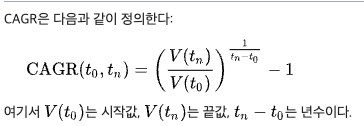


## 총 인구수 연평균 증가율

In [180]:
def calculate_average_growth_rate(df, colname, region, t0, tn):
    # 지정한 지역에 해당하는 행만 필터링을 합니다
    region_data = df[df[colname] == region]
    
    # 초기 및 최종 인구 값을 추출을 합니다
    initial_population = region_data[str(t0)].astype(int).values
    final_population = region_data[str(tn)].astype(int).values
    
    # 연평균 인구 증가율 계산합니다
    average_growth_rate = ((final_population / initial_population) ** (1 / (tn - t0)) - 1) * 100
    
    # 소수점 셋 째 자리에서 반올림
    average_growth_rate = np.round(average_growth_rate, 2)
    
    return average_growth_rate


# 출력
calculate_average_growth_rate(c_population_data_2018_to_2022, '행정구역(시군구)별', '세종특별자치시', 2018, 2022)[0]

5.12

In [188]:
def calculate_average_growth_rate(df, colname, t0, tn):
    result_df = df.copy()  # 원본 데이터프레임 복사
    
    for region in df[colname].unique():
        region_data = df[df[colname] == region]
        initial_population = region_data[str(t0)].astype(int).values  # 시작 연도의 인구 데이터 추출
        final_population = region_data[str(tn)].astype(int).values    # 끝 연도의 인구 데이터 추출
        
        # 평균 연평균 증가율 계산 공식: ((최종 인구 / 초기 인구) ^ (1 / 연도차)) - 1) * 100
        average_growth_rate = ((final_population / initial_population) ** (1 / (tn - t0)) - 1) * 100
        average_growth_rate = np.round(average_growth_rate, 2)  # 소수점 2자리까지 반올림
        
        # 결과 데이터프레임의 해당 지역 행에 연평균 증가율 값을 할당
        result_df.loc[result_df[colname] == region, '연평균증가율(%)'] = average_growth_rate
    
    return result_df

# calculate_average_growth_rate 함수를 호출하여 연평균 증가율 계산
result_df = calculate_average_growth_rate(c_population_data_2018_to_2022, '행정구역(시군구)별', 2018, 2022)
result_df

,행정구역(시군구)별,2018,2019,2020,2021,2022,연평균증가율(%)
0,전국,51826059,51849861,51829023,51638809,51439038,-0.19
1,서울특별시,9765623,9729107,9668465,9509458,9428372,-0.87
2,부산광역시,3441453,3413841,3391946,3350380,3317812,-0.91
3,대구광역시,2461769,2438031,2418346,2385412,2363691,-1.01
4,인천광역시,2954642,2957026,2942828,2948375,2967314,0.11
5,광주광역시,1459336,1456468,1450062,1441611,1431050,-0.49
6,대전광역시,1489936,1474870,1463882,1452251,1446072,-0.74
7,울산광역시,1155623,1148019,1136017,1121592,1110663,-0.99
8,세종특별자치시,314126,340575,355831,371895,383591,5.12
9,경기도,13077153,13239666,13427014,13565450,13589432,0.97


In [58]:
result_df.to_csv('행정구역_시군구_별_성별_인구수_2018~2022_avg.csv', index=False)

# 2. 2016 ~ 2022년 행정구역별 층간소음 민원 수
## 1) 데이터 전처리

In [167]:
call_df = pd.read_excel('../ori_data/콜센터신청_16_22.xlsx')
online_df = pd.read_excel('../ori_data/온라인신청_16_22.xlsx')

In [168]:
call_df

,구분,서울,인천,경기,부산,대구,울산,대전,광주,강원,충북,충남,전북,전남,경북,경남,제주,세종
0,’16년,3475,902,5768,821,461,240,343,274,172,213,258,201,174,349,449,68,36
1,’17년,2368,1018,7661,744,452,209,300,201,217,182,267,200,189,287,405,80,48
2,’18년,2871,1106,11865,950,528,283,396,298,238,206,310,297,189,460,570,118,65
3,’19년,1717,685,11538,594,260,117,181,184,124,165,203,104,149,203,325,65,33
4,’20년,4643,1510,14893,1398,711,324,518,508,297,418,564,368,391,488,831,155,115
5,’21년,5000,1656,20820,1628,916,391,589,603,362,398,711,533,415,678,1100,210,99
6,’22년,4635,1718,17570,1482,784,402,689,666,391,473,714,425,400,691,1069,181,171


In [171]:
online_df

,구분,서울,인천,경기,부산,대구,울산,대전,광주,강원,충북,충남,전북,전남,경북,경남,제주,세종
0,’16년,909,314,1252,266,147,74,158,86,61,85,141,72,72,135,176,11,33
1,’17년,1901,614,2471,532,329,149,245,202,133,163,256,161,142,269,369,41,44
2,’18년,1796,537,2341,460,327,109,250,193,126,153,240,161,117,273,302,41,55
3,’19년,2087,852,3069,626,316,181,271,259,175,263,331,173,145,304,424,49,85
4,’20년,3124,1042,4692,948,490,246,408,371,250,318,494,304,222,407,613,89,100
5,’21년,2413,720,3390,632,354,174,350,312,194,243,379,208,194,328,450,81,65
6,’22년,1656,570,2532,484,294,137,242,251,160,229,291,169,142,267,354,68,86


In [8]:
call_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분      7 non-null      object
 1   서울      7 non-null      int64 
 2   인천      7 non-null      int64 
 3   경기      7 non-null      int64 
 4   부산      7 non-null      int64 
 5   대구      7 non-null      int64 
 6   울산      7 non-null      int64 
 7   대전      7 non-null      int64 
 8   광주      7 non-null      int64 
 9   강원      7 non-null      int64 
 10  충북      7 non-null      int64 
 11  충남      7 non-null      int64 
 12  전북      7 non-null      int64 
 13  전남      7 non-null      int64 
 14  경북      7 non-null      int64 
 15  경남      7 non-null      int64 
 16  제주      7 non-null      int64 
 17  세종      7 non-null      int64 
dtypes: int64(17), object(1)
memory usage: 1.1+ KB


In [191]:
def process_call_df(df):
    # 행과 열 바꾸기
    tra_df = df.transpose()

    # 새로운 열 생성
    new_column = ['', '서울특별시', '인천광역시', '경기도', '부산광역시', '대구광역시', '울산광역시', '대전광역시', '광주광역시', '강원도', 
                  '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도', '세종특별자치시']
    new_column_name = ''
    tra_df.insert(0, new_column_name, new_column)
    
    # 첫 번째 행 삭제
    tra_df = tra_call_df.drop(index='구분')

    # 열 이름 변경
    tra_df.columns = ['구분', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

    # '구분' 열을 기준으로 행 순서 변경
    order = ['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도']
    df_reordered = tra_df.set_index('구분').loc[order].reset_index()
    
    return df_reordered




In [193]:
completed_call_df = process_call_df(call_df)

In [170]:
completed_online_df = process_call_df(online_df)

In [194]:
def sum_values(df1, df2):
    """
    두 데이터프레임의 값을 합산하고 '구분' 열을 중복 없이 할당하여 반환합니다.
    
    :param df1: 첫 번째 데이터프레임
    :param df2: 두 번째 데이터프레임
    :return: 합산된 데이터프레임
    """
    
    sum_df = df1 + df2

    sum_df['구분'] = list(df1['구분'])
    
    return sum_df


In [195]:
sum_values(completed_call_df, completed_online_df)

,구분,2016,2017,2018,2019,2020,2021,2022
0,서울특별시,4384,4269,4667,3804,7767,7413,6291
1,부산광역시,1087,1276,1410,1220,2346,2260,1966
2,대구광역시,608,781,855,576,1201,1270,1078
3,인천광역시,1216,1632,1643,1537,2552,2376,2288
4,광주광역시,360,403,491,443,879,915,917
5,대전광역시,501,545,646,452,926,939,931
6,울산광역시,314,358,392,298,570,565,539
7,세종특별자치시,42,82,91,133,165,98,201
8,경기도,7020,10132,14206,14607,19585,24210,20102
9,강원도,123,288,298,392,488,318,457


In [209]:
# 2016~2022년 연평균 층간소음 민원 수 증가율 추가
floor_noise_16_22 = calculate_average_growth_rate(floor_noise_16_22, '구분', 2018, 2022)

In [210]:
floor_noise_16_22

,구분,2016,2017,2018,2019,2020,2021,2022,연평균증가율(%)
0,서울특별시,4384,4269,4667,3804,7767,7413,6291,7.75
1,부산광역시,1087,1276,1410,1220,2346,2260,1966,8.67
2,대구광역시,608,781,855,576,1201,1270,1078,5.97
3,인천광역시,1216,1632,1643,1537,2552,2376,2288,8.63
4,광주광역시,360,403,491,443,879,915,917,16.90
5,대전광역시,501,545,646,452,926,939,931,9.57
6,울산광역시,314,358,392,298,570,565,539,8.29
7,세종특별자치시,69,92,120,118,215,164,257,20.97
8,경기도,7020,10132,14206,14607,19585,24210,20102,9.07
9,강원도,233,350,364,299,547,556,551,10.92


In [197]:
floor_noise_16_22.to_csv('complete_data_연도별_층간소음_신고현황_16_22.csv', index=False)

# 3. 2022년 원인별 층간소음 민원 수와 비율
## 1) 데이터 전처리

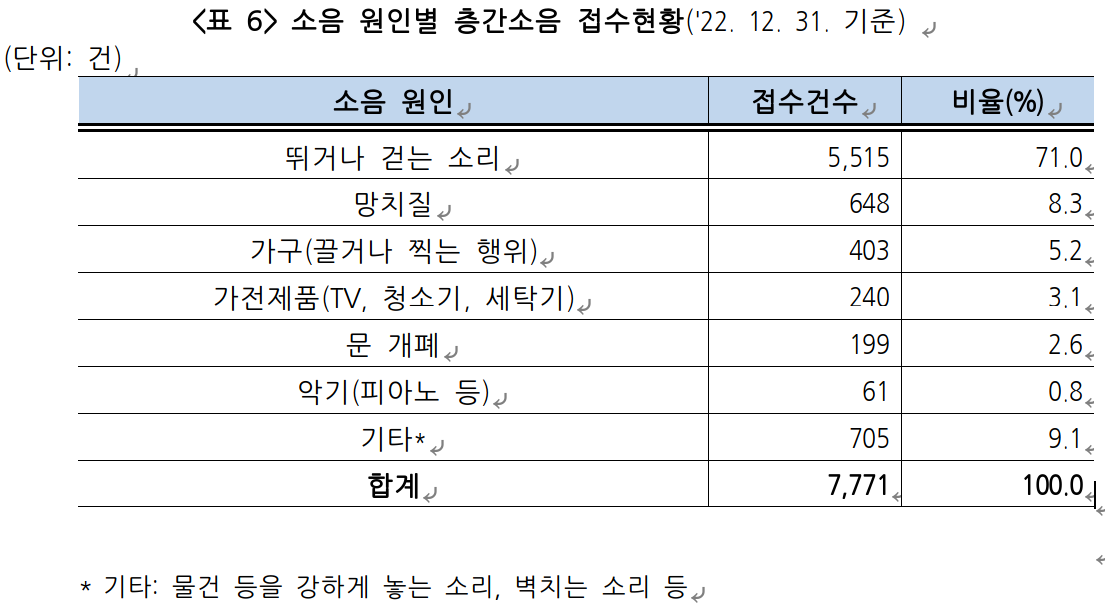

In [202]:
# 2022년 세종시 층간소음 데이터프레임 생성

data = {'소음 원인' : ['뛰거나 걷는 소리', '망치질', '가구(끌거나 찍는 행위)', '가전제품(TV, 청소기, 세탁기)',
                  '문 개폐', '악기(피아노 등)', '기타'],
       '접수건수' : [5515,648,403,240,199,61,705],
       '비율(%)' : [71.0, 8.3, 5.2, 3.1, 2.6, 0.8, 9.1],
       }
floor_noise_cause = pd.DataFrame(data)

In [203]:
floor_noise_cause

,소음 원인,접수건수,비율(%)
0,뛰거나 걷는 소리,5515,71.0
1,망치질,648,8.3
2,가구(끌거나 찍는 행위),403,5.2
3,"가전제품(TV, 청소기, 세탁기)",240,3.1
4,문 개폐,199,2.6
5,악기(피아노 등),61,0.8
6,기타,705,9.1


## 2) 2022년 원인별 층간소음 민원 비율 시각화

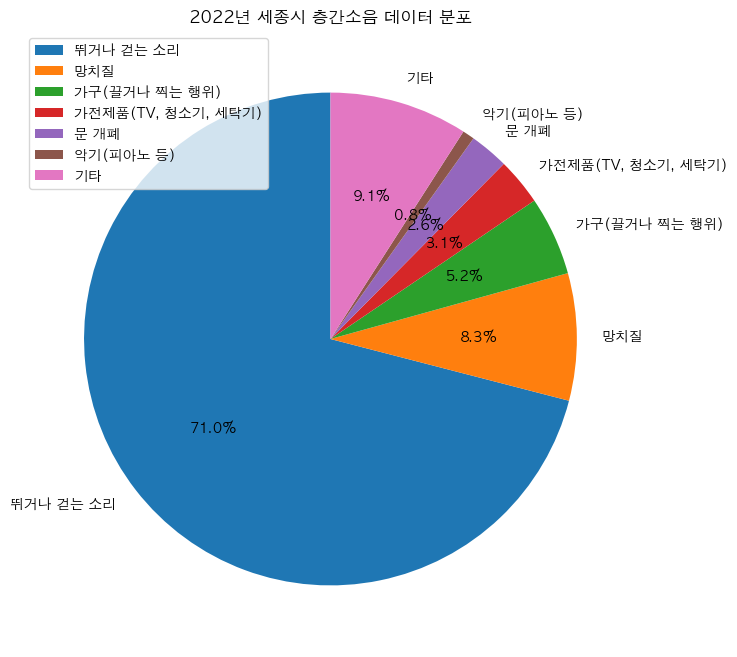

In [224]:
plt.figure(figsize=(8, 8))
plt.pie(floor_noise_cause['접수건수'], labels=floor_noise_cause['소음 원인'], autopct='%1.1f%%', startangle=90)
plt.title('2022년 세종시 층간소음 데이터 분포')
plt.legend(loc='upper left')  # 범례 위치 설정
plt.show()

# 3. 2015 ~ 2021년 행정구역별 신혼부부 수
## 1) 데이터 전처리

In [226]:
newlywed = pd.read_csv('../ori_data/시도별_신혼부부_2015_2021.csv')

In [227]:
newlywed

,행정구역별,2015,2016,2017,2018,2019,2020,2021
0,행정구역별,신혼부부 수 (A),신혼부부 수 (A),신혼부부 수 (A),신혼부부 수 (A),신혼부부 수 (A),신혼부부 수 (A),신혼부부 수 (A)
1,전국,1471647,1436948,1379766,1322406,1260117,1183750,1101455
2,서울특별시,291341,278294,263148,246867,232454,219101,200477
3,부산광역시,90578,88339,83545,77755,72403,67632,62431
4,대구광역시,62811,61356,59102,56985,54078,49774,45094
5,인천광역시,89747,87898,83619,80023,75794,69296,65347
6,광주광역시,40707,39309,37534,35659,33878,31648,29596
7,대전광역시,43803,42449,40061,37736,35066,32559,30342
8,울산광역시,38537,37507,35376,32861,30431,27835,24721
9,세종특별자치시,8107,9898,11031,12432,12966,12225,11475


In [228]:
newlywed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   행정구역별   19 non-null     object
 1   2015    19 non-null     object
 2   2016    19 non-null     object
 3   2017    19 non-null     object
 4   2018    19 non-null     object
 5   2019    19 non-null     object
 6   2020    19 non-null     object
 7   2021    19 non-null     object
dtypes: object(8)
memory usage: 1.3+ KB


In [231]:
newlywed_copy = newlywed.copy()

In [232]:
newlywed_copy.drop(0, inplace=True)

In [233]:
# 데이터 타입을 정수로 변환합니다.

columns_to_convert = ['2015', '2016', '2017', '2018', '2019', '2020', '2021']

for column in columns_to_convert:
    newlywed_copy[column] = newlywed_copy[column].astype(int)

# 결과 확인
newlywed_copy

,행정구역별,2015,2016,2017,2018,2019,2020,2021
1,전국,1471647,1436948,1379766,1322406,1260117,1183750,1101455
2,서울특별시,291341,278294,263148,246867,232454,219101,200477
3,부산광역시,90578,88339,83545,77755,72403,67632,62431
4,대구광역시,62811,61356,59102,56985,54078,49774,45094
5,인천광역시,89747,87898,83619,80023,75794,69296,65347
6,광주광역시,40707,39309,37534,35659,33878,31648,29596
7,대전광역시,43803,42449,40061,37736,35066,32559,30342
8,울산광역시,38537,37507,35376,32861,30431,27835,24721
9,세종특별자치시,8107,9898,11031,12432,12966,12225,11475
10,경기도,387989,383763,372622,366403,356169,341434,325067


## 2) 신혼부부 수 시각화

In [265]:
def plot_population_data(df):
    years = ['2015', '2016', '2017', '2018', '2019', '2020', '2021'] # 연도 선택
    regions = ['서울특별시', '경기도', '인천광역시', '세종특별자치시'] # 구역 선택(최대 4개)
    colors = ['blue', 'green', 'red', 'purple']
    
    filtered_df = df[df['행정구역별'].isin(regions)]

    plt.figure(figsize=(12, 8))

    for i, region in enumerate(filtered_df['행정구역별']):
        plt.subplot(2, 2, i + 1)
        plt.plot(years, filtered_df.iloc[i, 1:], marker='o', color=colors[i])
        plt.title(region)
        plt.xlabel('연도')
        plt.ylabel('인구 수')
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

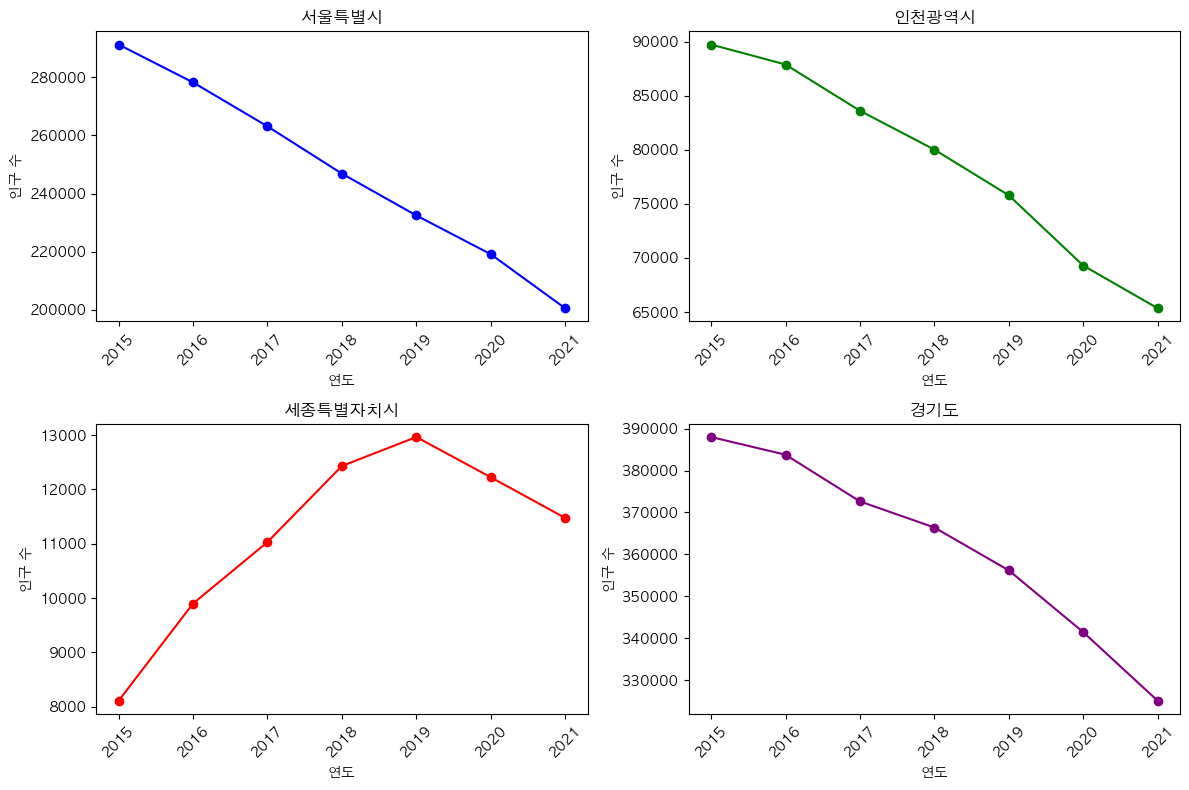

In [266]:
plot_population_data(newlywed_copy)

# 4. 연도별 아동기 인구 수(2014 ~ 2022)
## 1) 데이터 전처리 (2014 ~ 2016)
- 데이터 파일은 총 3개로 나뉘며 구조는 같음 
- df_pop_14_16 
- df_pop_17_19
- df_pop_20_22

In [268]:
df_pop_14_16 = pd.read_csv('../ori_data/201412_201612_연령별인구현황_연간.csv')

In [269]:
df_pop_14_16

,행정구역,2014년_계_총인구수,2014년_계_연령구간인구수,2014년_계_0~4세,2014년_계_5~9세,2014년_계_10~14세,2014년_남_총인구수,2014년_남_연령구간인구수,2014년_남_0~4세,2014년_남_5~9세,...,2016년_남_총인구수,2016년_남_연령구간인구수,2016년_남_0~4세,2016년_남_5~9세,2016년_남_10~14세,2016년_여_총인구수,2016년_여_연령구간인구수,2016년_여_0~4세,2016년_여_5~9세,2016년_여_10~14세
0,세종특별자치시 (3600000000),"156,125","28,454","9,831","9,693","8,930","78,862","14,504","5,002","4,932",...,"121,505","25,140","8,741","8,990","7,409","121,543","24,447","8,303","8,877","7,267"
1,세종특별자치시 세종특별자치시 세종특별자치시 (3611000000),"156,125","28,454","9,831","9,693","8,930","78,862","14,504","5,002","4,932",...,"121,505","25,140","8,741","8,990","7,409","121,543","24,447","8,303","8,877","7,267"


In [270]:
df_pop_14_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 46 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   행정구역             2 non-null      object
 1   2014년_계_총인구수     2 non-null      object
 2   2014년_계_연령구간인구수  2 non-null      object
 3   2014년_계_0~4세     2 non-null      object
 4   2014년_계_5~9세     2 non-null      object
 5   2014년_계_10~14세   2 non-null      object
 6   2014년_남_총인구수     2 non-null      object
 7   2014년_남_연령구간인구수  2 non-null      object
 8   2014년_남_0~4세     2 non-null      object
 9   2014년_남_5~9세     2 non-null      object
 10  2014년_남_10~14세   2 non-null      object
 11  2014년_여_총인구수     2 non-null      object
 12  2014년_여_연령구간인구수  2 non-null      object
 13  2014년_여_0~4세     2 non-null      object
 14  2014년_여_5~9세     2 non-null      object
 15  2014년_여_10~14세   2 non-null      object
 16  2015년_계_총인구수     2 non-null      object
 17  2015년_계_연령구간인구수  2 non-null      object

In [272]:
df_pop_14_16_copy = df_pop_14_16.copy()

In [273]:
# '인구수'와 '년도' 문자열이 포함된 모든 컬럼들을 필터링하여 삭제
strs_to_drop = ['총인구수', '연령구간인구수','계','0~4세']
cols_to_drop = [col for col in df_pop_14_16.columns if any(substring in col for substring in strs_to_drop)]
df = df_pop_14_16_copy.drop(columns=cols_to_drop)


In [274]:
df

,행정구역,2014년_남_5~9세,2014년_남_10~14세,2014년_여_5~9세,2014년_여_10~14세,2015년_남_5~9세,2015년_남_10~14세,2015년_여_5~9세,2015년_여_10~14세,2016년_남_5~9세,2016년_남_10~14세,2016년_여_5~9세,2016년_여_10~14세
0,세종특별자치시 (3600000000),"4,932","4,570","4,761","4,360","7,657","6,379","7,443","6,207","8,990","7,409","8,877","7,267"
1,세종특별자치시 세종특별자치시 세종특별자치시 (3611000000),"4,932","4,570","4,761","4,360","7,657","6,379","7,443","6,207","8,990","7,409","8,877","7,267"


In [275]:
# 중복되는 값 제거
df.drop(1, inplace=True)

# 행정구역 컬럼 이름을 년도로 변경
df.rename(columns={'행정구역': '년도'}, inplace=True)

In [277]:
# 새로운 행 데이터 생성 (리스트 형태로 각 열에 해당하는 데이터를 입력)
dummy_row = ['년도', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# DataFrame에 새로운 행 추가
df.loc[len(df)] = dummy_row

df

# 2014 ~ 2016년 데이터이므로, 총 3개의 행이 필요 -> 한 번 더 실행

,년도,2014년_남_5~9세,2014년_남_10~14세,2014년_여_5~9세,2014년_여_10~14세,2015년_남_5~9세,2015년_남_10~14세,2015년_여_5~9세,2015년_여_10~14세,2016년_남_5~9세,2016년_남_10~14세,2016년_여_5~9세,2016년_여_10~14세
0,세종특별자치시 (3600000000),"4,932","4,570","4,761","4,360","7,657","6,379","7,443","6,207","8,990","7,409","8,877","7,267"
1,년도,0,0,0,0,0,0,0,0,0,0,0,0
2,년도,0,0,0,0,0,0,0,0,0,0,0,0


In [278]:
# 년도 컬럼의 값 수정
df['년도'] = ['2014','2015','2016']

In [279]:
df

,년도,2014년_남_5~9세,2014년_남_10~14세,2014년_여_5~9세,2014년_여_10~14세,2015년_남_5~9세,2015년_남_10~14세,2015년_여_5~9세,2015년_여_10~14세,2016년_남_5~9세,2016년_남_10~14세,2016년_여_5~9세,2016년_여_10~14세
0,2014,"4,932","4,570","4,761","4,360","7,657","6,379","7,443","6,207","8,990","7,409","8,877","7,267"
1,2015,0,0,0,0,0,0,0,0,0,0,0,0
2,2016,0,0,0,0,0,0,0,0,0,0,0,0


In [280]:
def swap_values(df, row1, col1, row2, col2):
    # 임시 변수를 사용하여 값을 교환하는 함수입니다.
    
    # 첫 번째 위치의 값을 임시로 저장합니다.
    temp = df.at[row1, col1]
    
    # 첫 번째 위치에 두 번째 위치의 값을 할당하여 교환합니다.
    df.at[row1, col1] = df.at[row2, col2]
    
    # 두 번째 위치에 저장해 둔 첫 번째 위치의 값을 할당하여 완전한 교환을 수행합니다.
    df.at[row2, col2] = temp

In [282]:
# 데이터 복사
df1 = df.copy()

In [283]:
# swap_values(df1, 행 인덱스_1, '열 인덱스_1', 행 인덱스_2, '열 인덱스_2')

# 선택한 데이터 프레임에서 행 인덱스_1, '열 인덱스_1'에 해당하는 값과 행 인덱스_2, '열 인덱스_2'에 해당하는 값을 서로 교환합니다.

swap_values(df1, 1, df1.columns[1], 0, df1.columns[5])
swap_values(df1, 2, df1.columns[1], 0, df1.columns[9])

swap_values(df1, 0, df1.columns[2], 0, df1.columns[3])
swap_values(df1, 1, df1.columns[2], 0, df1.columns[7])
swap_values(df1, 2, df1.columns[2], 0, df1.columns[11])

swap_values(df1, 1, df1.columns[3], 0, df1.columns[6])
swap_values(df1, 2, df1.columns[3], 0, df1.columns[10])

swap_values(df1, 1, df1.columns[4], 0, df1.columns[8])
swap_values(df1, 2, df1.columns[4], 0, df1.columns[12])


In [284]:
df1

,년도,2014년_남_5~9세,2014년_남_10~14세,2014년_여_5~9세,2014년_여_10~14세,2015년_남_5~9세,2015년_남_10~14세,2015년_여_5~9세,2015년_여_10~14세,2016년_남_5~9세,2016년_남_10~14세,2016년_여_5~9세,2016년_여_10~14세
0,2014,"4,932","4,761","4,570","4,360",0,0,0,0,0,0,0,0
1,2015,"7,657","7,443","6,379","6,207",0,0,0,0,0,0,0,0
2,2016,"8,990","8,877","7,409","7,267",0,0,0,0,0,0,0,0


In [285]:
def remove_zero_columns(df):
    # 각 열의 합을 계산하여 0이 아닌 열만 선택합니다.
    non_zero_columns = df.columns[df.sum() != 0]
    # 선택된 열로 새로운 데이터프레임을 생성합니다.
    new_df = df[non_zero_columns].copy()
    # 인덱스를 재설정합니다.
    new_df.reset_index(drop=True, inplace=True)
    # 열 이름을 알맞게 바꿉니다.
    new_df.columns = ['년도', '남_5_9세','여_5_9세','남_10_14세','여_10_14세']
    return new_df

In [286]:
new_df_2014_2016 = remove_zero_columns(df1)

In [287]:
new_df_2014_2016

,년도,남_5_9세,여_5_9세,남_10_14세,여_10_14세
0,2014,"4,932","4,761","4,570","4,360"
1,2015,"7,657","7,443","6,379","6,207"
2,2016,"8,990","8,877","7,409","7,267"


## 2) 데이터 전처리 (2017 ~ 2019)

In [ ]:
df_pop_17_19 = pd.read_csv('../ori_data/201712_201912_연령별인구현황_연간.csv')

In [288]:
# '인구수'와 '년도' 문자열이 포함된 모든 컬럼들을 필터링하여 삭제
strs_to_drop = ['총인구수', '연령구간인구수','계','0~4세']
cols_to_drop = [col for col in df_pop_17_19.columns if any(substring in col for substring in strs_to_drop)]
df = df_pop_17_19.drop(columns=cols_to_drop)

In [289]:
# 중복되는 값 제거
df.drop(1, inplace=True)

# 행정구역 컬럼 이름을 년도로 변경
df.rename(columns={'행정구역': '년도'}, inplace=True)

In [291]:
# 새로운 행 데이터 생성 (리스트 형태로 각 열에 해당하는 데이터를 입력)
dummy_row = ['년도', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# DataFrame에 새로운 행 추가
df.loc[len(df)] = dummy_row

df

# 2017 ~ 2019년 데이터이므로, 총 3개의 행이 필요 -> 한 번 더 실행

,년도,2017년_남_5~9세,2017년_남_10~14세,2017년_여_5~9세,2017년_여_10~14세,2018년_남_5~9세,2018년_남_10~14세,2018년_여_5~9세,2018년_여_10~14세,2019년_남_5~9세,2019년_남_10~14세,2019년_여_5~9세,2019년_여_10~14세
0,세종특별자치시 (3600000000),"10,642","8,838","10,304","8,855","11,992","10,155","11,442","10,215","12,937","11,209","12,314","11,112"
1,년도,0,0,0,0,0,0,0,0,0,0,0,0
2,년도,0,0,0,0,0,0,0,0,0,0,0,0


In [292]:
# 년도 컬럼의 값 수정
df['년도'] = ['2017','2018','2019']

# 원본 데이터 복사
df1 = df.copy()

In [293]:
swap_values(df1, 1, df1.columns[1], 0, df1.columns[5])
swap_values(df1, 2, df1.columns[1], 0, df1.columns[9])

swap_values(df1, 0, df1.columns[2], 0, df1.columns[3])
swap_values(df1, 1, df1.columns[2], 0, df1.columns[7])
swap_values(df1, 2, df1.columns[2], 0, df1.columns[11])

swap_values(df1, 1, df1.columns[3], 0, df1.columns[6])
swap_values(df1, 2, df1.columns[3], 0, df1.columns[10])

swap_values(df1, 1, df1.columns[4], 0, df1.columns[8])
swap_values(df1, 2, df1.columns[4], 0, df1.columns[12])

In [294]:
df1

,년도,2017년_남_5~9세,2017년_남_10~14세,2017년_여_5~9세,2017년_여_10~14세,2018년_남_5~9세,2018년_남_10~14세,2018년_여_5~9세,2018년_여_10~14세,2019년_남_5~9세,2019년_남_10~14세,2019년_여_5~9세,2019년_여_10~14세
0,2017,"10,642","10,304","8,838","8,855",0,0,0,0,0,0,0,0
1,2018,"11,992","11,442","10,155","10,215",0,0,0,0,0,0,0,0
2,2019,"12,937","12,314","11,209","11,112",0,0,0,0,0,0,0,0


In [295]:
new_df_2017_2019 = remove_zero_columns(df1)

In [296]:
# 2017_2019 연령별 인구 현황 데이터 전처리 완료
new_df_2017_2019

,년도,남_5_9세,여_5_9세,남_10_14세,여_10_14세
0,2017,"10,642","10,304","8,838","8,855"
1,2018,"11,992","11,442","10,155","10,215"
2,2019,"12,937","12,314","11,209","11,112"


## 3) 데이터 전처리 (2020 ~ 2022)

In [298]:
df_pop_20_22 = pd.read_csv('../ori_data/202012_202212_연령별인구현황_연간.csv')

In [299]:
# '인구수'와 '년도' 문자열이 포함된 모든 컬럼들을 필터링하여 삭제
strs_to_drop = ['총인구수', '연령구간인구수','계','0~4세']
cols_to_drop = [col for col in df_pop_20_22.columns if any(substring in col for substring in strs_to_drop)]
df = df_pop_20_22.drop(columns=cols_to_drop)

In [300]:
# 중복되는 값 제거
df.drop(1, inplace=True)

# 행정구역 컬럼 이름을 년도로 변경
df.rename(columns={'행정구역': '년도'}, inplace=True)

In [302]:
# 새로운 행 데이터 생성 (리스트 형태로 각 열에 해당하는 데이터를 입력)
dummy_row = ['년도', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# DataFrame에 새로운 행 추가
df.loc[len(df)] = dummy_row

df

# 2020 ~ 2022년 데이터이므로, 총 3개의 행이 필요 -> 한 번 더 실행

,년도,2020년_남_5~9세,2020년_남_10~14세,2020년_여_5~9세,2020년_여_10~14세,2021년_남_5~9세,2021년_남_10~14세,2021년_여_5~9세,2021년_여_10~14세,2022년_남_5~9세,2022년_남_10~14세,2022년_여_5~9세,2022년_여_10~14세
0,세종특별자치시 (3600000000),"13,550","12,249","12,832","12,070","13,835","13,145","13,230","12,847","13,787","13,981","13,200","13,576"
1,년도,0,0,0,0,0,0,0,0,0,0,0,0
2,년도,0,0,0,0,0,0,0,0,0,0,0,0


In [303]:
# 년도 컬럼의 값 수정
df['년도'] = ['2020','2021','2022']

# 원본 데이터 복사
df1 = df.copy()

In [304]:
swap_values(df1, 1, df1.columns[1], 0, df1.columns[5])
swap_values(df1, 2, df1.columns[1], 0, df1.columns[9])

swap_values(df1, 0, df1.columns[2], 0, df1.columns[3])
swap_values(df1, 1, df1.columns[2], 0, df1.columns[7])
swap_values(df1, 2, df1.columns[2], 0, df1.columns[11])

swap_values(df1, 1, df1.columns[3], 0, df1.columns[6])
swap_values(df1, 2, df1.columns[3], 0, df1.columns[10])

swap_values(df1, 1, df1.columns[4], 0, df1.columns[8])
swap_values(df1, 2, df1.columns[4], 0, df1.columns[12])

In [305]:
df1

,년도,2020년_남_5~9세,2020년_남_10~14세,2020년_여_5~9세,2020년_여_10~14세,2021년_남_5~9세,2021년_남_10~14세,2021년_여_5~9세,2021년_여_10~14세,2022년_남_5~9세,2022년_남_10~14세,2022년_여_5~9세,2022년_여_10~14세
0,2020,"13,550","12,832","12,249","12,070",0,0,0,0,0,0,0,0
1,2021,"13,835","13,230","13,145","12,847",0,0,0,0,0,0,0,0
2,2022,"13,787","13,200","13,981","13,576",0,0,0,0,0,0,0,0


In [306]:
new_df_2020_2022 = remove_zero_columns(df1)

In [307]:
# 2020_2022 연령별 인구 현황 데이터 전처리 완료
new_df_2020_2022

,년도,남_5_9세,여_5_9세,남_10_14세,여_10_14세
0,2020,"13,550","12,832","12,249","12,070"
1,2021,"13,835","13,230","13,145","12,847"
2,2022,"13,787","13,200","13,981","13,576"


In [311]:
# 데이터프레임을 세로 방향으로 연결합니다.
complete_df = pd.concat([new_df_2014_2016, new_df_2017_2019, new_df_2020_2022], axis=0)

# 데이터프레임 인덱스를 초기화 합니다
complete_df.reset_index(drop=True, inplace=True)

# 결과 확인
complete_df

,년도,남_5_9세,여_5_9세,남_10_14세,여_10_14세
0,2014,"4,932","4,761","4,570","4,360"
1,2015,"7,657","7,443","6,379","6,207"
2,2016,"8,990","8,877","7,409","7,267"
3,2017,"10,642","10,304","8,838","8,855"
4,2018,"11,992","11,442","10,155","10,215"
5,2019,"12,937","12,314","11,209","11,112"
6,2020,"13,550","12,832","12,249","12,070"
7,2021,"13,835","13,230","13,145","12,847"
8,2022,"13,787","13,200","13,981","13,576"


In [312]:
complete_df.info()
# 인구수에 해당되는 데이터 타입을 정수로 변환

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   년도        9 non-null      object
 1   남_5_9세    9 non-null      object
 2   여_5_9세    9 non-null      object
 3   남_10_14세  9 non-null      object
 4   여_10_14세  9 non-null      object
dtypes: object(5)
memory usage: 488.0+ bytes


In [310]:
# # 쉼표(,)를 제거하고 데이터 타입을 정수로 변환합니다.

# columns_to_convert = ['남_5_9세', '여_5_9세', '남_10_14세', '여_10_14세']

# for column in columns_to_convert:
#     complete_df[column] = complete_df[column].str.replace(',', '').astype(int)

# # 결과 확인
# complete_df

,년도,남_5_9세,여_5_9세,남_10_14세,여_10_14세
0,2014,4932,4761,4570,4360
1,2015,7657,7443,6379,6207
2,2016,8990,8877,7409,7267
3,2017,10642,10304,8838,8855
4,2018,11992,11442,10155,10215
5,2019,12937,12314,11209,11112
6,2020,13550,12832,12249,12070
7,2021,13835,13230,13145,12847
8,2022,13787,13200,13981,13576


In [313]:
# CSV 파일로 추출합니다.
complete_df.to_csv('complete_data_14_22_연령별인구현황.csv', index=False)

In [314]:
# 저장한 데이터 확인
pd.read_csv('complete_data_14_22_연령별인구현황.csv')

,년도,남_5_9세,여_5_9세,남_10_14세,여_10_14세
0,2014,"4,932","4,761","4,570","4,360"
1,2015,"7,657","7,443","6,379","6,207"
2,2016,"8,990","8,877","7,409","7,267"
3,2017,"10,642","10,304","8,838","8,855"
4,2018,"11,992","11,442","10,155","10,215"
5,2019,"12,937","12,314","11,209","11,112"
6,2020,"13,550","12,832","12,249","12,070"
7,2021,"13,835","13,230","13,145","12,847"
8,2022,"13,787","13,200","13,981","13,576"
